## 1. Import Necessary Libraries

In [22]:
import pandas as pd                # For data manipulation
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For data visualization
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.linear_model import LinearRegression      # The linear regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Evaluation metrics

## 2. Load the Dataset

In [2]:
# Load data from CSV
df = pd.read_csv("Salary_Data.csv")  # Make sure the file is in your working directory

# Display the first few rows
print(df.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


## 3. Visualize the Data

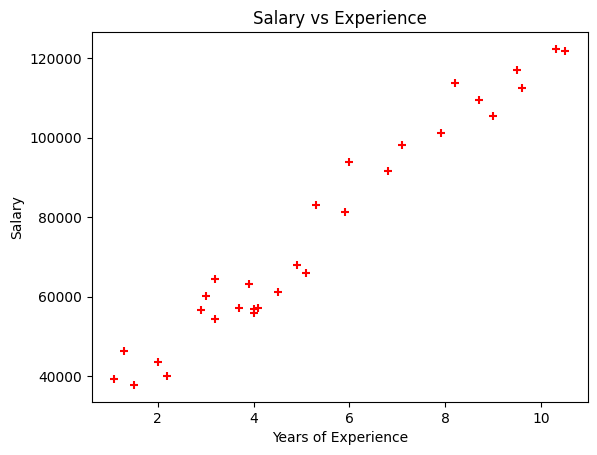

In [4]:
# Scatter plot of the data
plt.scatter(df['YearsExperience'], df['Salary'], marker='+', color='red')
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
# plt.grid(True)
plt.show()


## 4. Data Preparation

In [5]:
# Independent variable (X) and dependent variable (y)
X = df[['YearsExperience']]   # 2D array
y = df['Salary']              # 1D array


In [6]:
X.shape

(30, 1)

In [7]:
y.shape

(30,)

## 5. Split the Dataset

In [8]:
# Splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 27
Testing samples: 3


In [9]:
X_train.shape

(27, 1)

In [10]:
y_train.shape

(27,)

In [11]:
X_train[0:5]

,YearsExperience
17,5.3
8,3.2
9,3.7
28,10.3
24,8.7


In [12]:
# df_test=pd.DataFrame(X_train, y_train)

In [13]:
# df_test.head()

## 6. Train the Linear Regression Model

In [14]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the learned coefficients
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

Intercept (b0): 26098.018402613416
Slope (b1): 9371.313117259971


### Equation learned by model:

Salary = 𝑏0 + 𝑏1.YearsExperience


In [15]:
model.coef_

array([9371.31311726])

In [16]:
model.intercept_

26098.018402613416

## 7. Make Predictions

In [17]:
# Predict salaries for the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


      Actual      Predicted
27  112635.0  116062.624328
15   67938.0   72017.452677
23  113812.0  102942.785964


## 8. Evaluate the Model

In [24]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Mean Absolute Error:", mae)


Mean Squared Error: 48843452.14621687
R² Score: 0.8928775350863083
Mean Absolute Error: 6125.4303471170815


### MSE: Lower is better

### R² Score: Closer to 1 means better fit

In [19]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Model Coefficient: {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")

Mean Squared Error: 48843452.15
R-squared Score: 0.89
Model Coefficient: 9371.31
Model Intercept: 26098.02


## 9. Plot the Regression Line

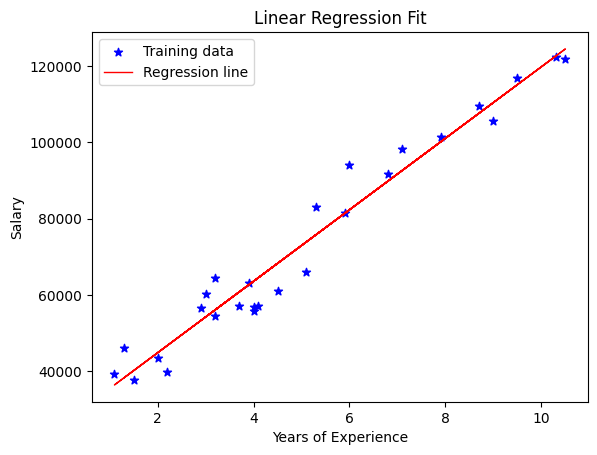

In [20]:
# Plot the training data and regression line
plt.scatter(X_train, y_train, color='blue',marker="*", label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=1, label='Regression line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.legend()
# plt.grid(True)
plt.show()


## 10. Try Predicting a New Value

In [21]:
# # Predict salary for 5 years of experience
experience = pd.DataFrame({"YearsExperience": [0]})
predicted_salary = model.predict(experience)
print(f"Predicted Salary for 5 years of experience: Rs {predicted_salary[0]:.2f}")

Predicted Salary for 5 years of experience: Rs 26098.02
